In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [ ]:
ruta_zip = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)
directorio_base = os.path.join(os.path.dirname(ruta_zip), 'cats_and_dogs_filtered')

directorio_entrenamiento = os.path.join(directorio_base, 'train')
directorio_validacion = os.path.join(directorio_base, 'validation')

In [ ]:
tamano_imagen = (150, 150)
batch_tamano = 32
epocas = 50

generador_entrenamiento = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

generador_validacion = ImageDataGenerator(rescale=1./255)

entrenamiento = generador_entrenamiento.flow_from_directory(
    directorio_entrenamiento,
    target_size=tamano_imagen,
    batch_size=batch_tamano,
    class_mode='binary'
)

validacion = generador_validacion.flow_from_directory(
    directorio_validacion,
    target_size=tamano_imagen,
    batch_size=batch_tamano,
    class_mode='binary'
)


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 520ms/step - accuracy: 0.5240 - loss: 0.8261 - val_accuracy: 0.5860 - val_loss: 0.7490
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 252ms/step - accuracy: 0.6281 - loss: 0.7362 - val_accuracy: 0.6140 - val_loss: 0.7074
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - accuracy: 0.6512 - loss: 0.6893 - val_accuracy: 0.6690 - val_loss: 0.6589
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.7023 - loss: 0.6510 - val_accuracy: 0.6810 - val_loss: 0.6345
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 252ms/step - accuracy: 0.6952 - loss: 0.6334 - val_accuracy: 0.7230 - val_loss: 0.6068
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - accuracy: 0.7275 - loss: 0.6052 - val_accuracy: 0.6870 - val_loss: 0.6120
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 233ms/step - accuracy: 0.7055 - loss: 0.6097 - va

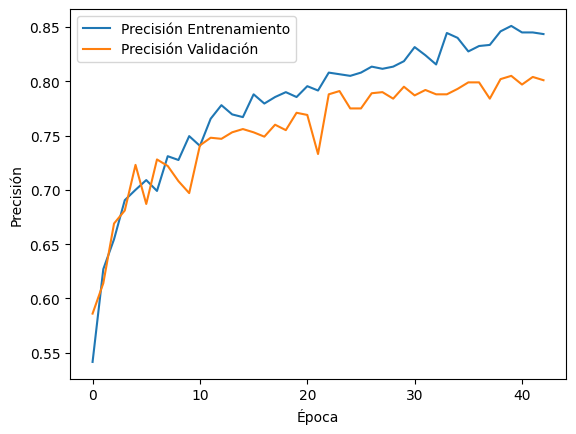

Precisión de entrenamiento: 84.35%
Precisión de validación: 80.10%


In [ ]:
modelo = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),  # Incremento de filtros
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),  # Más filtros para mejorar la capacidad
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
modelo.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

historial = modelo.fit(
    entrenamiento,
    epochs=epocas,
    validation_data=validacion,
    callbacks=[early_stopping]
)

plt.plot(historial.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

print(f"Precisión de entrenamiento: {historial.history['accuracy'][-1]*100:.2f}%")
print(f"Precisión de validación: {historial.history['val_accuracy'][-1]*100:.2f}%")
